# Bubble data

I have the idea of creating a class for the bubble data. The data we use are effectively np.ndarray, but it is convenient to have a few methods specific to our simulation, such as `get_center`, `get_edge`, etc. 

Another idea is it might be nice to have an interface to interact with the .h5 simulation data, to speed up visualization.

## 0 Packages

In [1]:
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
import pyvista as pv
pv.set_jupyter_backend("none")
import yaml
import numpy as np
import time

## 1 Read data

In [2]:
folder = Path("~/Documents/test").expanduser().resolve()
with h5py.File(folder / "results" / "data.h5", "r") as f:
    t = f["t"][:]
    x = f["x"][:]
    h = f["h"][:]

In [3]:
with open(folder / "params.yaml") as f:
    params = yaml.safe_load(f)

In [4]:
mesh = np.load(folder / "mesh.npy")

## 2 Plot trajectory using `matplotlib`

(np.float64(-0.001007066046815768),
 np.float64(0.021148386983131127),
 np.float64(0.000283461556965733),
 np.float64(0.0017787170921948411))

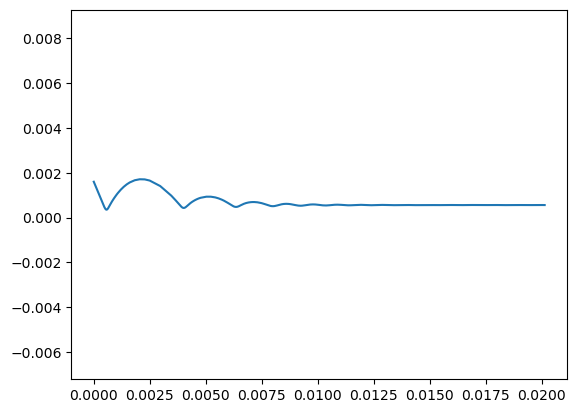

In [45]:
plt.plot(x[:, 0], x[:, 1])
plt.axis("equal")

## 3 Plot trajectory using `pyvista`

In [46]:
traj = pv.PolyData(x[::])
theta = params["theta"] / 180 * np.pi
up = np.array([np.sin(theta), -np.cos(theta), 0])
pl = pv.Plotter()

pl.camera_position = [(0, 0, -0.02),
                      (0, 0, 0),
                      up]
pl.add_mesh(traj)
pl.show_axes()
pl.show()

Widget(value='<iframe src="http://localhost:64185/index.html?ui=P_0x1591065d0_15&reconnect=auto" class="pyvist…

## 4 Plot mesh shape using `pyvista`

In [49]:
center = (
        (x[:, 0].min() + x[:, 0].max()) / 2,
        (x[:, 1].min() + x[:, 1].max()) / 2
)
                
points = np.column_stack([mesh[:, 0], h[0], mesh[:, 2]])
surf = pv.PolyData(points).delaunay_2d()
theta = params["theta"] / 180 * np.pi
up = np.array([np.sin(theta), -np.cos(theta), 0])
pl = pv.Plotter()
pl.camera_position = [(center[0], center[1], -0.05),
                      (center[0], center[1], 0),
                      up]
pl.add_mesh(surf)
pl.show_axes()
pl.enable_anti_aliasing()
pl.show()

Widget(value='<iframe src="http://localhost:64185/index.html?ui=P_0x1581ef320_18&reconnect=auto" class="pyvist…

## 5 Live update `pyvista` canvas

In [22]:
R = params["R"]
sphere = pv.PolyData(x[0, :])
surface = pv.Box((-0.04, 0.04, -0.001, 0, -0.01, 0.01))
theta = params["theta"] / 180 * np.pi
up = np.array([np.sin(theta), -np.cos(theta), 0])

pl = pv.Plotter(notebook=False)

pl.add_mesh(sphere, point_size=1000000*R, render_points_as_spheres=True)
pl.add_mesh(
    surface,
    color='steelblue',       # Set a solid color
    show_edges=True,         # Show the edges to define the box shape
    edge_color='black',      # Make edges black for better contrast
    smooth_shading=True,     # Smooth the appearance of the faces
    lighting=True            # Ensure lighting is enabled for 3D appearance
)
pl.add_ruler(
    pointa=(0.0, 0.0, 0.0),
    pointb=(0.04, 0.0, 0.0)
)
pl.camera_position = [(x[0, 1]*np.sin(theta)+10*R, 0, -30*R),
                      (x[0, 1]*np.sin(theta)+10*R, 0, 0),
                      up]
# pl.show_axes()
# pl.show_bounds = True
# pl.show_grid()
pl.show(interactive_update=True)

for i in range(0, len(x), 1):
    sphere.points = x[i]
    print(i, end="\r")
    pl.update()
    time.sleep(0.05)
pl.show()